In [ ]:
!gdown 1DgSngPojJ2mE1d4vAN0tgRuNDueRVoVw

Downloading...
From: https://drive.google.com/uc?id=1DgSngPojJ2mE1d4vAN0tgRuNDueRVoVw
To: /content/weatherAUS.csv
100% 15.3M/15.3M [00:00<00:00, 29.7MB/s]


In [ ]:
#Cài đặt thêm thư viện
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


# Thông tin về các trường dữ liệu trong data

* Thông tin về các trường dữ liệu trong data
  1. Date: Ngày quan sát dữ liệu
  2. Location: Địa điểm quan sát
  3. MinTemp: Nhiệt độ thấp nhất (°C)
  4. MaxTemp: Nhiệt độ lớn nhất (°C)
  5. Rainfall: Tổng lượng mưa (mm)
  6. Evaporation: Lượng nước bốc hơi (mm)
  7. Sunshine: Thời gian có nắng (giờ)
  8. WindGustDir: Hướng gió mạnh nhất
  9. WindGustSpeed: Tốc độ gió lớn nhất (km/h)
  10. WindDir9am: Hướng gió lúc 9h sáng
  11. WindDir3pm: Hướng gió lúc 3h chiều
  12. WindSpeed9am: Tốc độ gió lúc 9h sáng (km/h)
  13. WindSpeed3pm: Tốc độ gió lúc 3h chiều (km/h)
  14. Humidity9am: Độ ẩm lúc 9h sáng (%)
  15. Humidity3pm: Độ ẩm lúc 3h chiều(%)
  16. Pressure9am: Áp suất khí quyển lúc 9h sáng (hpa)
  17. Pressure3pm: Áp suất khí quyển lúc 3h chiều (hpa)
  18. Cloud9am: Độ phủ của mây lúc 9h sáng (oktas)
  19. Cloud3pm: Độ phủ của mây lúc 3h chiều (oktas)
  20. Temp9am: Nhiệt độ lúc 9h sáng (°C)
  21. Temp3pm: Nhiệt độ lúc 3h chiều (°C)
  22. RainToday: Dự đoán mưa trong ngày hôm nay (Có hoặc không)
  23. RainTomorrow: Dự đoán mưa ngày hôm sau (Có hoặc không)

# Import các thư viện cần thiết

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [ ]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


# Exploratory data analysis

In [ ]:
df.shape

(142193, 23)

Dữ liệu có 142193 bản ghi với 23 cột

In [ ]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Nhận xét:
- Chúng ta có thể thấy rằng tập dữ liệu chứa hỗn hợp các biến phân loại và số.
- Biến phân loại có kiểu dữ liệu là object.
- Biến số có kiểu dữ liệu float64.
- Ngoài ra, có một số giá trị bị thiếu trong tập dữ liệu.

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


# Phân tích đơn biến

## Biến phân loại

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Có {} biến phân loại\n'.format(len(categorical)))

print('Các biến phân loại là :', categorical)

Có 7 biến phân loại

Các biến phân loại là : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Nhận xét:
- Có một biến liên quan đến ngày tháng.
- Còn lại 6 biến phân loại: Location, WindGustDir, WindDir9am, WindDir3pm, RainToday và RainTomorrow.
- Có 2 biến phân loại nhị phân là: RainToday và RainTomorrow.
- RainTomorrow sẽ là biến cần dự đoán.

In [ ]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [ ]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


In [ ]:
for var in categorical:

    print(df[var].value_counts())

2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964

In [ ]:
for var in categorical:

    print(df[var].value_counts()/np.float(len(df)))

2013-12-01    0.000345
2014-01-09    0.000345
2014-01-11    0.000345
2014-01-12    0.000345
2014-01-13    0.000345
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Launceston          0.021295
Ballarat            0.021295
Albany              0.021211
Albury              0.021175
PerthAirport        0.021161
MelbourneAirport    0.021161
Mildura             0.021147
SydneyAirport       0.021133
Nuriootpa           0.021112
Sale                0.021098
Watsonia            0.021091
Tuggeranong         0.021084
Portland            0.021070
Woomera   

In [ ]:
for var in categorical:

    print(var, 'chứa', len(df[var].unique()), 'nhãn')

Date chứa 3436 nhãn
Location chứa 49 nhãn
WindGustDir chứa 17 nhãn
WindDir9am chứa 17 nhãn
WindDir3pm chứa 17 nhãn
RainToday chứa 3 nhãn
RainTomorrow chứa 2 nhãn


## FE cho Date

In [ ]:
df['Date'].dtypes

dtype('O')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [ ]:
df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [ ]:
df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [ ]:
df.drop('Date', axis=1, inplace = True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


## Xử lý các biến phân loại khác

### Location

In [ ]:
print('Location chứa', len(df.Location.unique()), 'nhãn')

Location chứa 49 nhãn


### WindGustDir

In [ ]:
print('WindGustDir chứa', len(df['WindGustDir'].unique()), 'nhãn')

WindGustDir chứa 17 nhãn


In [ ]:
print('Có', df['WindGustDir'].isnull().sum(), 'giá trị bị thiếu trong biến WindGustDir')

Có 9330 giá trị bị thiếu trong biến WindGustDir


### WindDir9am

In [ ]:
print('WindDir9am chứa', len(df['WindDir9am'].unique()), 'nhãn')

WindDir9am chứa 17 nhãn


In [ ]:
print('Có', df['WindDir9am'].isnull().sum(), 'giá trị bị thiếu trong biến WindDir9am')

Có 10013 giá trị bị thiếu trong biến WindDir9am


### WindDir3pm

In [ ]:
print('WindDir3pm chứa', len(df['WindDir3pm'].unique()), 'nhãn')

WindDir3pm chứa 17 nhãn


In [ ]:
print('Có', df['WindDir3pm'].isnull().sum(), 'giá trị bị thiếu trong biến WindDir3pm')

Có 3778 giá trị bị thiếu trong biến WindDir3pm


### RainToday

In [ ]:
print('RainToday chứa', len(df['RainToday'].unique()), 'nhãn')

RainToday chứa 3 nhãn


In [ ]:
print('Có', df['RainToday'].isnull().sum(), 'giá trị bị thiếu trong biến RainToday')

Có 1406 giá trị bị thiếu trong biến RainToday


## Biến số

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('Có {} biến phân loại\n'.format(len(numerical)))

print('Các biến phân loại là :', numerical)

Có 19 biến phân loại

Các biến phân loại là : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [ ]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


Nhận xét:
- Có 16 biến số.
- Bao gồm: MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am và Temp3pm.
- Tất cả các biến số đều thuộc loại liên tục.

In [ ]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

- Nhận xét: Tất cả 16 biến số đều bị thiếu dữ liệu

In [ ]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

- Khi xem xét kỹ hơn, chúng ta có thể thấy rằng các cột Rainfall, Evaporation, WindSpeed9am và WindSpeed3pm có thể chứa các giá trị outlier.

Text(0, 0.5, 'WindSpeed3pm')

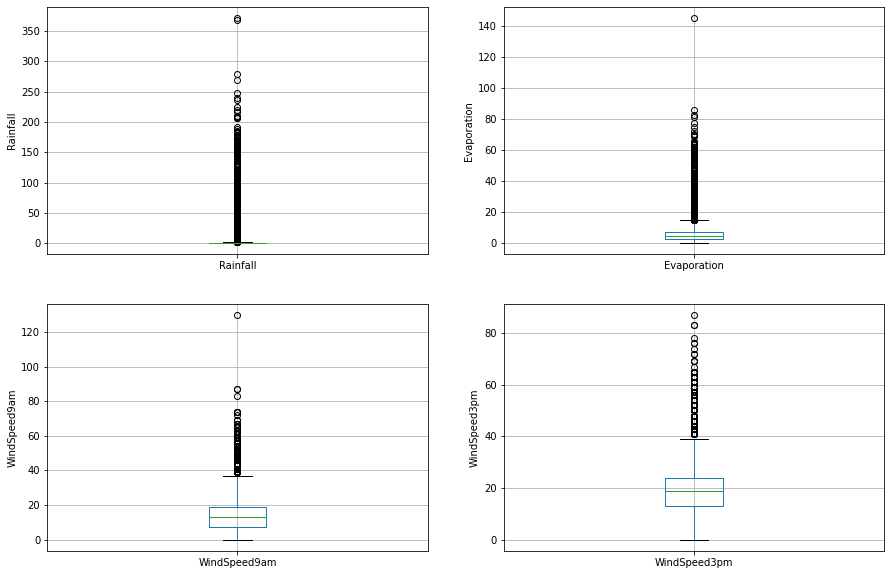

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

- Các boxplot ở trên xác nhận rằng có rất nhiều giá trị outlier trong các biến số này.

Text(0, 0.5, 'RainTomorrow')

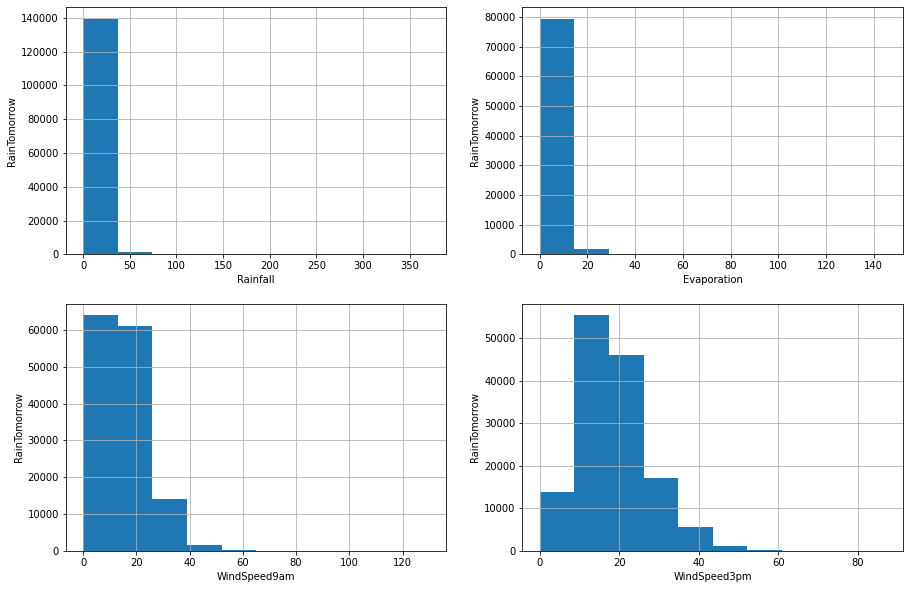

In [ ]:
#Kiểm tra sự phân phối của các biến
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

- Ta sẽ sử dụng IQR để xác định được các outlier

In [ ]:
# Tìm outliers của biến Rainfall

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Các giá trị outlier của Rainfall < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
print('Giá trị bé nhất của biến Rainfall là ', df['Rainfall'].min())
print('Giá trị lớn nhất của biến Rainfall là ', df['Rainfall'].max())

Các giá trị outlier của Rainfall < -2.4000000000000004 hoặc > 3.2
Giá trị bé nhất của biến Rainfall là  0.0
Giá trị lớn nhất của biến Rainfall là  371.0


- Như vậy các outlier của Rainfall có giá trị lớn hơn 3.2

In [ ]:
# Tìm outliers của biến Evaporation

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Các giá trị outlier của Evaporation < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
print('Giá trị bé nhất của biến Evaporation là ', df['Evaporation'].min())
print('Giá trị lớn nhất của biến Evaporation là ', df['Evaporation'].max())

Các giá trị outlier của Evaporation < -11.800000000000002 hoặc > 21.800000000000004
Giá trị bé nhất của biến Evaporation là  0.0
Giá trị lớn nhất của biến Evaporation là  145.0


- Như vậy các outlier của Evaporation có giá trị lớn hơn 21.8

In [ ]:
# Tìm outliers của biến WindSpeed9am

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('Các giá trị outlier của WindSpeed9am < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
print('Giá trị bé nhất của biến WindSpeed9am là ', df['WindSpeed9am'].min())
print('Giá trị lớn nhất của biến WindSpeed9am là ', df['WindSpeed9am'].max())

Các giá trị outlier của WindSpeed9am < -29.0 hoặc > 55.0
Giá trị bé nhất của biến WindSpeed9am là  0.0
Giá trị lớn nhất của biến WindSpeed9am là  130.0


- Như vậy các outlier của WindSpeed9am có giá trị lớn hơn 55.0

In [ ]:
# Tìm outliers của biến WindSpeed3pm

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('Các giá trị outlier của WindSpeed3pm < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
print('Giá trị bé nhất của biến WindSpeed3pm là ', df['WindSpeed3pm'].min())
print('Giá trị lớn nhất của biến WindSpeed3pm là ', df['WindSpeed3pm'].max())

Các giá trị outlier của WindSpeed3pm < -20.0 hoặc > 57.0
Giá trị bé nhất của biến WindSpeed3pm là  0.0
Giá trị lớn nhất của biến WindSpeed3pm là  87.0


Như vậy các outlier của WindSpeed3pm có giá trị lớn hơn 57.0

# Phân tích đa biến

In [ ]:
correlation = df.corr()

## Heat Map

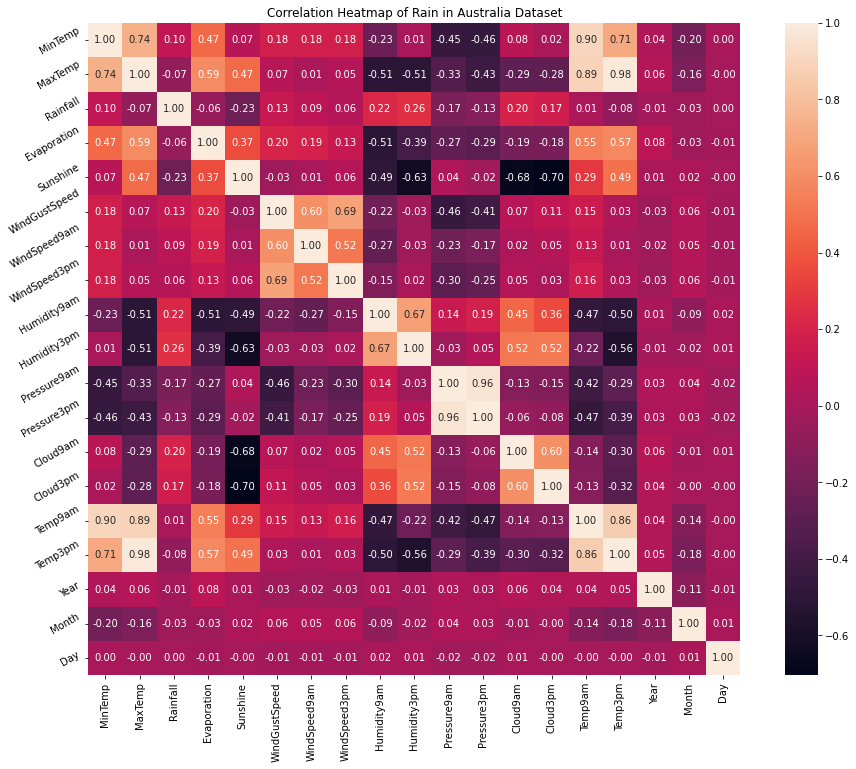

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

Từ bản đồ nhiệt tương quan ở trên, chúng ta có thể kết luận rằng:

- Các biến MinTemp và MaxTemp có mối tương quan cao (hệ số tương quan = 0,74).

- Các biến MinTemp và Temp3pm có mối tương quan cao (hệ số tương quan = 0,71).

- Các biến MinTemp và Temp9am có mối tương quan cao (hệ số tương quan = 0,90).

- Các biến MaxTemp và Temp9am có mối tương quan cao (hệ số tương quan = 0,89).

- Các biến MaxTemp và Temp3pm có tương quan cao (hệ số tương quan = 0,98).

- Các biến WindGustSpeed và WindSpeed3pm có mối tương quan cao (hệ số tương quan = 0,69).

- Các biến Pressure9am và Pressure3pm có mối tương quan cao (hệ số tương quan = 0,96).

- Các biến Temp9am và Temp3pm có tương quan cao (hệ số tương quan = 0,86).

# Xác định biến mục tiêu và các đặc trưng

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

# Chia data thành 2 bộ train và test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

# Feature Engineering

## Xử lý các biến số bị thiếu

In [ ]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [ ]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [ ]:
X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


In [ ]:
# Gán các giá trị bị thiếu trong X_train và X_test với trung bình cột tương ứng trong X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [ ]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

## Xử lý các biến phân loại bị thiếu

In [ ]:
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [ ]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [ ]:
# Gán các biến phân loại bị thiếu với giá trị xuất hiện thường xuyên nhất

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [ ]:
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

## Kiểm tra tất cả các dữ liệu

In [ ]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

## Xử lý các giá trị outlier của các biến số

- Chúng ta đã thấy các cột Rainfall, Evaporation, WindSpeed9am và WindSpeed3pm chứa các giá trị ngoại lệ. Ta sẽ sử dụng phương pháp top-coding approach để giới hạn các giá trị tối đa và loại bỏ các giá trị ngoại lệ khỏi các biến trên.

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [ ]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [ ]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [ ]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [ ]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [ ]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


- Bây giờ chúng ta có thể thấy rằng các giá trị ngoại lệ trong các cột Rainfall, Evaporation, WindSpeed9am và WindSpeed3pm đã được giới hạn.

## Mã hóa các biến phân loại

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

In [ ]:
X_train['Location'] = le.fit_transform(X_train['Location'])
X_train['WindGustDir'] = le.fit_transform(X_train['WindGustDir'])
X_train['WindDir9am'] = le.fit_transform(X_train['WindDir9am'])
X_train['WindDir3pm'] = le.fit_transform(X_train['WindDir3pm'])
X_train['RainToday'] = le.fit_transform(X_train['RainToday'])
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
110803,46,13.9,22.6,0.2,4.8,8.5,8,41.0,10,8,...,1013.9,1013.4,5.0,5.0,18.8,20.4,0,2014,4,25
87289,8,22.4,29.4,2.0,6.0,6.3,1,33.0,10,9,...,1016.9,1013.1,7.0,5.0,26.4,27.5,1,2015,11,2
134949,3,9.7,36.2,0.0,11.4,12.3,0,31.0,4,3,...,1018.1,1013.6,1.0,1.0,28.5,35.0,0,2014,10,19
85553,8,20.5,30.1,0.0,8.8,11.1,2,37.0,10,0,...,1014.1,1010.8,2.0,3.0,27.3,29.4,0,2010,10,30
16110,24,16.8,29.2,0.0,4.8,8.5,13,39.0,3,9,...,1017.6,1015.2,5.0,8.0,22.2,27.0,0,2012,11,8


In [ ]:
X_test['Location'] = le.fit_transform(X_test['Location'])
X_test['WindGustDir'] = le.fit_transform(X_test['WindGustDir'])
X_test['WindDir9am'] = le.fit_transform(X_test['WindDir9am'])
X_test['WindDir3pm'] = le.fit_transform(X_test['WindDir3pm'])
X_test['RainToday'] = le.fit_transform(X_test['RainToday'])
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
86232,8,17.4,29.0,0.0,3.6,11.1,5,33.0,9,5,...,1013.1,1008.9,1.0,0.0,26.1,27.8,0,2012,10,9
57576,6,6.8,14.4,0.8,0.8,8.5,8,46.0,12,8,...,1010.2,1012.4,5.0,4.0,10.4,12.7,0,2011,5,24
124071,43,10.1,15.4,3.2,4.8,8.5,15,31.0,12,10,...,1014.4,1016.1,5.0,5.0,12.3,13.0,1,2009,8,6
117955,31,14.4,33.4,0.0,8.0,11.6,12,41.0,2,12,...,1019.2,1016.6,1.0,0.0,23.0,32.3,0,2009,3,6
133468,3,6.8,14.3,3.2,0.2,7.3,0,28.0,1,2,...,1027.6,1024.4,7.0,1.0,7.3,13.7,1,2010,7,2


# Feature Scaling

In [ ]:
X_train.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,23.705065,12.193497,23.237216,0.675080,5.151606,8.041154,8.056842,39.884074,7.005573,7.782188,...,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,0.221012,2012.759727,6.404021,15.710419
std,14.246762,6.388279,7.094149,1.183837,2.823707,2.769480,4.692869,13.116959,4.517221,4.545131,...,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,0.414930,2.540419,3.427798,8.796821
min,0.000000,-8.200000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2007.000000,1.000000,1.000000
25%,11.000000,7.600000,18.000000,0.000000,4.000000,8.200000,4.000000,31.000000,3.000000,4.000000,...,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,2011.000000,3.000000,8.000000
50%,24.000000,12.000000,22.600000,0.000000,4.800000,8.500000,9.000000,39.000000,7.000000,8.000000,...,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,2013.000000,6.000000,16.000000
75%,36.000000,16.800000,28.200000,0.600000,5.400000,8.700000,13.000000,46.000000,11.000000,12.000000,...,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,2015.000000,9.000000,23.000000
max,48.000000,33.900000,48.100000,3.200000,21.800000,14.500000,15.000000,135.000000,15.000000,15.000000,...,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,1.000000,2017.000000,12.000000,31.000000


In [ ]:
cols = X_train.columns
cols

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.493856,0.484406,0.530004,0.210962,0.236312,0.554562,0.537123,0.262667,0.467038,0.518813,...,0.613895,0.610258,0.516867,0.587949,0.510444,0.519936,0.221012,0.575973,0.491275,0.490347
std,0.296808,0.151741,0.134105,0.369949,0.129528,0.190999,0.312858,0.101682,0.301148,0.303009,...,0.111383,0.106803,0.254747,0.264731,0.136366,0.131586,0.414930,0.254042,0.311618,0.293227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.229167,0.375297,0.431002,0.000000,0.183486,0.565517,0.266667,0.193798,0.200000,0.266667,...,0.545455,0.542400,0.333333,0.500000,0.411392,0.424184,0.000000,0.400000,0.181818,0.233333
50%,0.500000,0.479810,0.517958,0.000000,0.220183,0.586207,0.600000,0.255814,0.466667,0.533333,...,0.613223,0.609600,0.555556,0.625000,0.504219,0.508637,0.000000,0.600000,0.454545,0.500000
75%,0.750000,0.593824,0.623819,0.187500,0.247706,0.600000,0.866667,0.310078,0.733333,0.800000,...,0.682645,0.676800,0.666667,0.750000,0.605485,0.608445,0.000000,0.800000,0.727273,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [ ]:
y_pred_lr = LR.predict(X_test)
y_pred_lr

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 3175  3197]
 [ 1203 20864]]


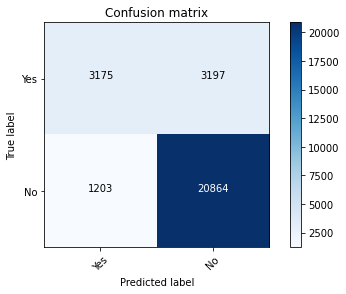

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_lr, labels=['Yes','No'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test, y_pred_lr), '%')

Accuracy of LR is: 84.52828861774324 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          No       0.87      0.95      0.90     22067
         Yes       0.73      0.50      0.59      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.84      0.85      0.83     28439



## Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

Confusion matrix, without normalization
[[ 4258  2114]
 [ 3980 18087]]


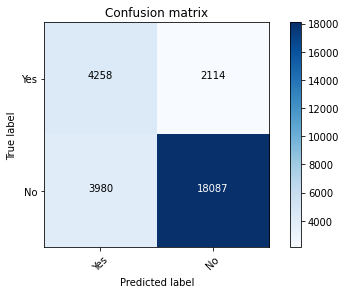

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_gnb, labels=['Yes','No'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

In [ ]:
print("Accuracy of GNB is:", 100 * accuracy_score(y_test, y_pred_gnb), '%')

Accuracy of GNB is: 78.57167973557438 %


In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          No       0.87      0.95      0.90     22067
         Yes       0.73      0.50      0.59      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.84      0.85      0.83     28439



## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# SVC với linear kernel và C=1.0
svc = SVC(kernel = 'linear', C = 1.0)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

Confusion matrix, without normalization
[[ 2986  3386]
 [ 1032 21035]]


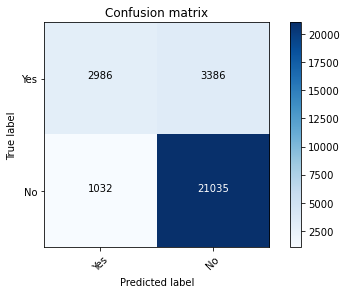

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svc, labels=['Yes','No'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn import metrics
print("Accuracy of SVC is:", 100 * metrics.accuracy_score(y_test, y_pred_svc), '%')

Accuracy of SVC is: 84.46499525299764 %


In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     22067
         Yes       0.74      0.47      0.57      6372

    accuracy                           0.84     28439
   macro avg       0.80      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439



## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
cols

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Year', 'Month', 'Day'],
      dtype='object')

[Text(0.6452540994045294, 0.9875, 'Humidity3pm <= 0.715\ngini = 0.348\nsamples = 113754\nvalue = [88249, 25505]\nclass = Yes'),
 Text(0.3812222440466103, 0.9625, 'Humidity3pm <= 0.515\ngini = 0.25\nsamples = 94949\nvalue = [81051, 13898]\nclass = Yes'),
 Text(0.13573075401334236, 0.9375, 'Sunshine <= 0.534\ngini = 0.148\nsamples = 54485\nvalue = [50095, 4390]\nclass = Yes'),
 Text(0.042239888246681234, 0.9125, 'Pressure3pm <= 0.585\ngini = 0.348\nsamples = 6429\nvalue = [4986, 1443]\nclass = Yes'),
 Text(0.020162065679565563, 0.8875, 'WindGustSpeed <= 0.364\ngini = 0.45\nsamples = 2903\nvalue = [1912, 991]\nclass = Yes'),
 Text(0.006880905821502146, 0.8625, 'Humidity3pm <= 0.265\ngini = 0.394\nsamples = 1733\nvalue = [1265, 468]\nclass = Yes'),
 Text(0.0014845547756545342, 0.8375, 'WindGustSpeed <= 0.248\ngini = 0.177\nsamples = 285\nvalue = [257, 28]\nclass = Yes'),
 Text(0.0013969057852099862, 0.8125, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]\nclass = Yes'),
 Text(0.0015722037660990

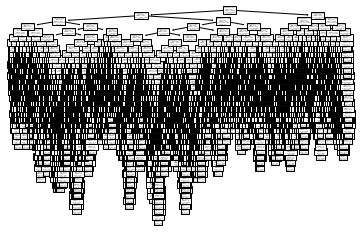

In [ ]:
tree.plot_tree(clf,feature_names=cols, class_names=['Yes','No'])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [ ]:
for col in cols:
  print('\''+col+'\'',end=',')

'Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','Year','Month','Day',

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4)
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree, feature_names=['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','Year','Month','Day'])
print(r)

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- class: No
|   |   |   |--- Pressure3pm >  0.58
|   |   |   |   |--- class: No
|   |   |--- Sunshine >  0.53
|   |   |   |--- WindGustSpeed <= 0.40
|   |   |   |   |--- class: No
|   |   |   |--- WindGustSpeed >  0.40
|   |   |   |   |--- class: No
|   |--- Humidity3pm >  0.51
|   |   |--- WindGustSpeed <= 0.33
|   |   |   |--- Rainfall <= 0.92
|   |   |   |   |--- class: No
|   |   |   |--- Rainfall >  0.92
|   |   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.33
|   |   |   |--- Pressure3pm <= 0.55
|   |   |   |   |--- class: Yes
|   |   |   |--- Pressure3pm >  0.55
|   |   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.83
|   |   |--- WindGustSpeed <= 0.30
|   |   |   |--- Rainfall <= 0.84
|   |   |   |   |--- class: No
|   |   |   |--- Rainfall >  0.84
|   |   |   |   |--- class: Yes
|   |   |--- WindGustSpe

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Rain Tomorrow")

'Rain Tomorrow.pdf'

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=cols, class_names=['Yes', 'No'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

In [ ]:
graph

In [ ]:
heartTree = DecisionTreeClassifier(criterion="entropy")
heartTree.fit(X_train, y_train)
y_pred_dt = heartTree.predict(X_test)

Confusion matrix, without normalization
[[ 3486  2886]
 [ 3013 19054]]


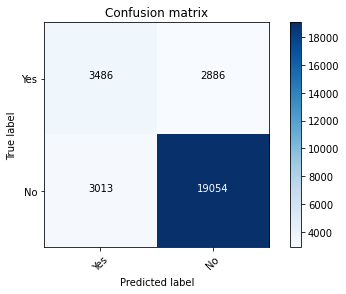

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_dt, labels=['Yes', 'No'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes', 'No'],normalize= False,  title='Confusion matrix')

In [ ]:
print("Accuracy of Decision Tree is:", 100 * accuracy_score(y_test, y_pred_dt), '%')

Accuracy of Decision Tree is: 79.25735785365168 %


In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

          No       0.87      0.86      0.87     22067
         Yes       0.54      0.55      0.54      6372

    accuracy                           0.79     28439
   macro avg       0.70      0.71      0.70     28439
weighted avg       0.79      0.79      0.79     28439



##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':y_pred_rf}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
score_rfc = score
out_rfc = output

Training Score: 0.9999824182006787
Testing Score: 0.8581525370090369
  Predicted
0        No
1        No
2        No
3        No
4        No


Confusion matrix, without normalization
[[ 3248  3124]
 [  910 21157]]


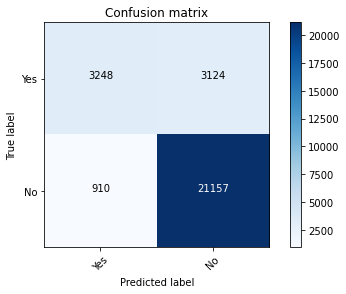

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rf, labels=['Yes', 'No'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes', 'No'],normalize= False,  title='Confusion matrix')

In [ ]:
print("Accuracy of RF is:", 100 * accuracy_score(y_test, y_pred_rf), '%')

Accuracy of RF is: 85.8152537009037 %


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22067
         Yes       0.78      0.51      0.62      6372

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.85     28439



##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 40, p = 2, weights = 'distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Confusion matrix, without normalization
[[ 2511  3861]
 [  785 21282]]


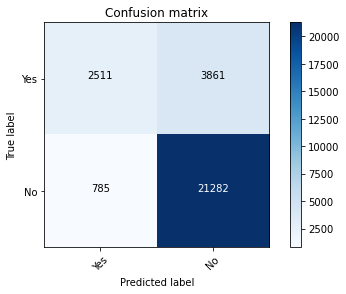

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn, labels=['Yes', 'No'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes', 'No'],normalize= False,  title='Confusion matrix')

In [ ]:
print("Accuracy of KNN is:", 100 * accuracy_score(y_test, y_pred_knn), '%')

Accuracy of KNN is: 83.66327929955342 %


In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

          No       0.85      0.96      0.90     22067
         Yes       0.76      0.39      0.52      6372

    accuracy                           0.84     28439
   macro avg       0.80      0.68      0.71     28439
weighted avg       0.83      0.84      0.82     28439



# Grid Search cho model Logistic Regression

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

## Xác định tham số

In [ ]:
# GridSearch cho LR
param_grid = [{'solver':['liblinear'],'penalty' : ['l1', 'l2'], 'C': [0.001,0.009,0.01,0.09,1,5,10,25]}
              ]
LR_grid = GridSearchCV(estimator = LR, param_grid = param_grid, cv = 5, verbose=True)
LR_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             verbose=True)

In [ ]:
LR_grid.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

##Sử dụng tham số mới

In [ ]:
# Logistic Regression
LR1 = LogisticRegression(C=1, solver='liblinear', penalty='l2').fit(X_train,y_train)
y_pred_lr2 = LR1.predict(X_test)

In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test, y_pred_lr2), '%')

Accuracy of LR is: 84.52828861774324 %


##So sánh trước và sau Grid Search

In [ ]:
print("Accuracy of LR before Grid Search is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_lr)))
print("Accuracy of LR after Grid Search is: {:.2f} %".format(100 * accuracy_score(y_test, y_pred_lr2)))

Accuracy of LR before Grid Search is: 84.53 %
Accuracy of LR after Grid Search is: 84.53 %


# Boosting

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 84.48%


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(learning_rate=0.01,random_state=0)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 82.44%


## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
y_train2 = le.fit_transform(y_train)

In [ ]:
y_test2 = le.fit_transform(y_test)

In [ ]:
model = xgb.XGBClassifier(random_state=0, eta=0.01)
model.fit(X_train, y_train2)
accuracy = model.score(X_test, y_test2)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 84.60%
